In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,PatientID,Age,Gender,BMI,BloodPressure,GlucoseLevel,FamilyHistory,PhysicalActivity,Smoking,AlcoholIntake,DietType,HighRisk
0,1,58,Female,27.676567,117,171.571841,1,Moderate,1,1,HighCarbs,1
1,2,71,Female,37.348306,147,145.178792,0,Low,0,1,HighCarbs,1
2,3,48,Male,27.476381,132,89.105152,0,High,1,0,HighCarbs,0
3,4,34,Female,28.431771,130,175.446090,1,Low,0,0,HighCarbs,1
4,5,62,Male,39.792338,128,152.674112,1,High,0,0,HighFats,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,23,Male,20.410065,179,187.566771,0,Low,1,1,Balanced,1
996,997,20,Male,33.200713,160,176.263020,1,High,1,1,Balanced,1
997,998,68,Female,30.219769,146,168.416255,1,Low,1,0,Balanced,1
998,999,59,Male,39.581112,115,77.228718,0,High,1,1,Balanced,0


In [ ]:
df = df.drop(['PatientID'], axis='columns')
df.dropna(inplace=True)
df.describe()

,Age,BMI,BloodPressure,GlucoseLevel,FamilyHistory,Smoking,AlcoholIntake,HighRisk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.200000,29.132034,133.584000,134.879729,0.509000,0.521000,0.504000,0.678000
std,17.372905,6.213993,25.416234,37.554829,0.500169,0.499809,0.500234,0.467477
min,20.000000,18.505107,90.000000,70.001513,0.000000,0.000000,0.000000,0.000000
25%,36.000000,23.566539,112.000000,102.132086,0.000000,0.000000,0.000000,0.000000
50%,51.000000,29.267182,133.000000,135.269698,1.000000,1.000000,1.000000,1.000000
75%,66.000000,34.535970,155.000000,167.550926,1.000000,1.000000,1.000000,1.000000
max,79.000000,39.921219,179.000000,199.942501,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].map( {'Male' : 0, 'Female': 1})

In [ ]:
df['PhysicalActivity'].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Low' : 0, 'Moderate' : 1, 'High' : 2})

In [ ]:
df['DietType'].unique()

array(['HighCarbs', 'HighFats', 'Balanced'], dtype=object)

In [ ]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df

,Age,Gender,BMI,BloodPressure,GlucoseLevel,FamilyHistory,PhysicalActivity,Smoking,AlcoholIntake,HighRisk,DietType_HighCarbs,DietType_HighFats
0,58,1,27.676567,117,171.571841,1,1,1,1,1,1,0
1,71,1,37.348306,147,145.178792,0,0,0,1,1,1,0
2,48,0,27.476381,132,89.105152,0,2,1,0,0,1,0
3,34,1,28.431771,130,175.446090,1,0,0,0,1,1,0
4,62,0,39.792338,128,152.674112,1,2,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,23,0,20.410065,179,187.566771,0,0,1,1,1,0,0
996,20,0,33.200713,160,176.263020,1,2,1,1,1,0,0
997,68,1,30.219769,146,168.416255,1,0,1,0,1,0,0
998,59,0,39.581112,115,77.228718,0,2,1,1,0,0,0


In [ ]:
X = df.drop(['HighRisk'], axis='columns')
Y = df['HighRisk']

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
models = {
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier' :GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  results[name] = {
      'accuracy' : accuracy_score(y_test, y_pred),
      'classification_report' : classification_report(y_test, y_pred)
  }


In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_model.fit(x_train, y_train)
y_pred = mlp_model.predict(x_test)
#print(mlp_model.loss_)

results['MLPClassifier'] = {
    'accuracy' : accuracy_score(y_test, y_pred),
    'classification_report' : classification_report(y_test, y_pred)
}


In [ ]:
for name, result in results.items():
  print(f"Model: {name}")
  print(f"Accuracy: {result['accuracy']:.4f}")
  print(f"Classification Report:\n{result['classification_report']}")
  print('-' * 55)

Model: RandomForestClassifier
Accuracy: 0.9950
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.99      1.00      1.00       145

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

-------------------------------------------------------
Model: GradientBoostingClassifier
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       145

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

-------------------------------------------------------
Model: MLPClassifier
Accuracy: 0.8900
Classification Report:
              precision    re

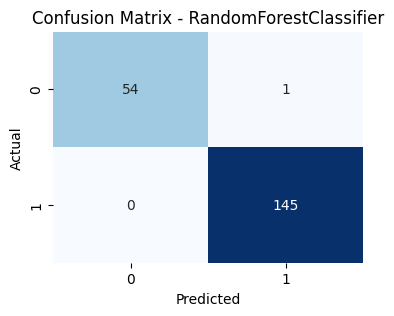

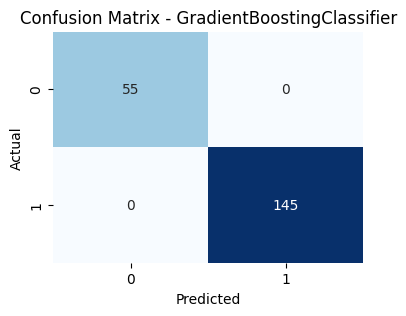

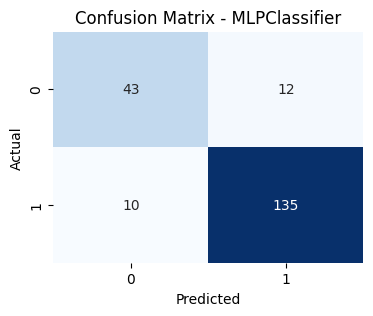

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3)) #(width = 4, height = 3 (in inches))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion matrix for MLPClassifier
y_pred_mlp = mlp_model.predict(x_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MLPClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()